### Para este caso usaremos una regresion lógica como modelo

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import hvplot.pandas
from scipy import stats

%matplotlib inline
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

In [20]:
df = pd.read_csv('./Dataset.csv')
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


### Hacemos un analisis EDA

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [22]:
df.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [23]:
pd.set_option('display.float', '{:.2f}'.format)
df.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.00,12684.00,12684.00,12684.00,12684.00,12684.00,12684.00,12684.00
mean,63.30,0.41,1.00,0.56,0.12,0.21,0.79,0.57
std,19.15,0.49,0.00,0.50,0.32,0.41,0.41,0.50
min,30.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,55.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00
50%,80.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00
75%,80.00,1.00,1.00,1.00,0.00,0.00,1.00,1.00
max,80.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


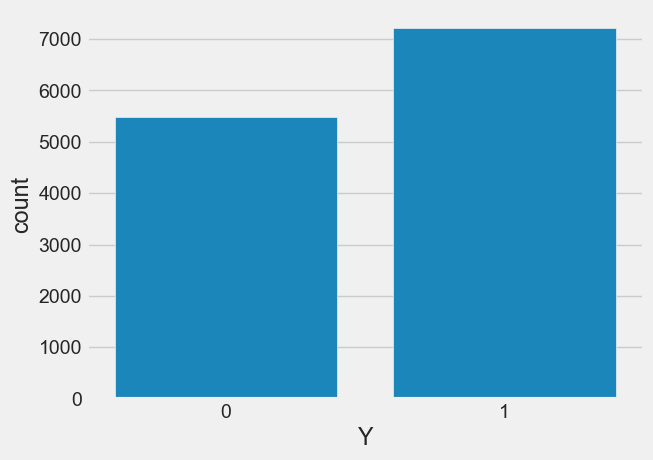

In [24]:
df.Y.value_counts()
sns.countplot(df, x='Y')
plt.show()

In [25]:
df.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [26]:
cat_val = []
cont_val = []

for column in df.columns:
    if len(df[column].unique()) <=10:
        cat_val.append(column)
    else:
        cont_val.append(column)

cat_val

['destination',
 'passanger',
 'weather',
 'temperature',
 'time',
 'coupon',
 'expiration',
 'gender',
 'age',
 'maritalStatus',
 'has_children',
 'education',
 'income',
 'car',
 'Bar',
 'CoffeeHouse',
 'CarryAway',
 'RestaurantLessThan20',
 'Restaurant20To50',
 'toCoupon_GEQ5min',
 'toCoupon_GEQ15min',
 'toCoupon_GEQ25min',
 'direction_same',
 'direction_opp',
 'Y']

<Axes: xlabel='temperature', ylabel='count'>

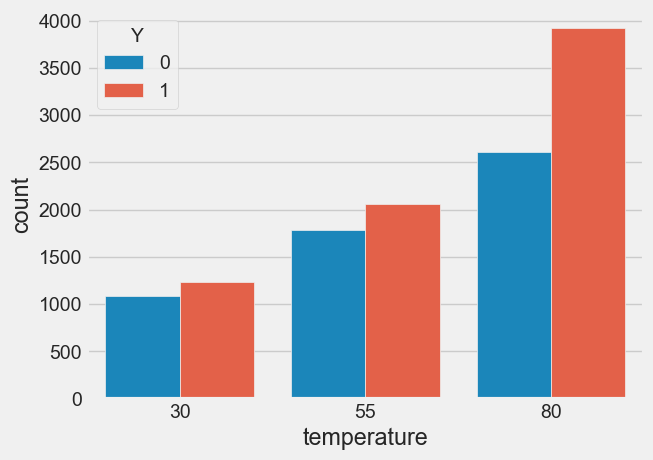

In [27]:
sns.countplot(df, x="temperature", hue="Y")

<Axes: xlabel='has_children', ylabel='count'>

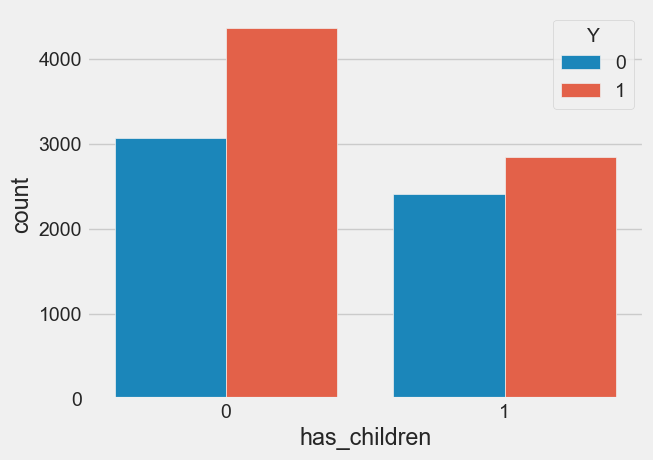

In [28]:
sns.countplot(df, x="has_children", hue="Y")

<Axes: xlabel='direction_opp', ylabel='count'>

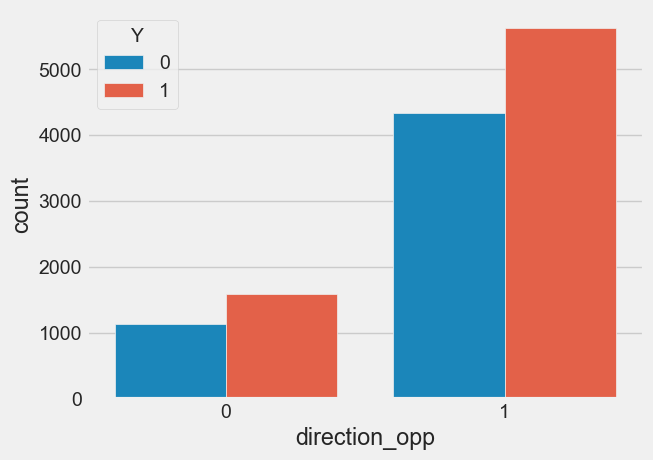

In [29]:
sns.countplot(df, x="direction_opp", hue="Y")

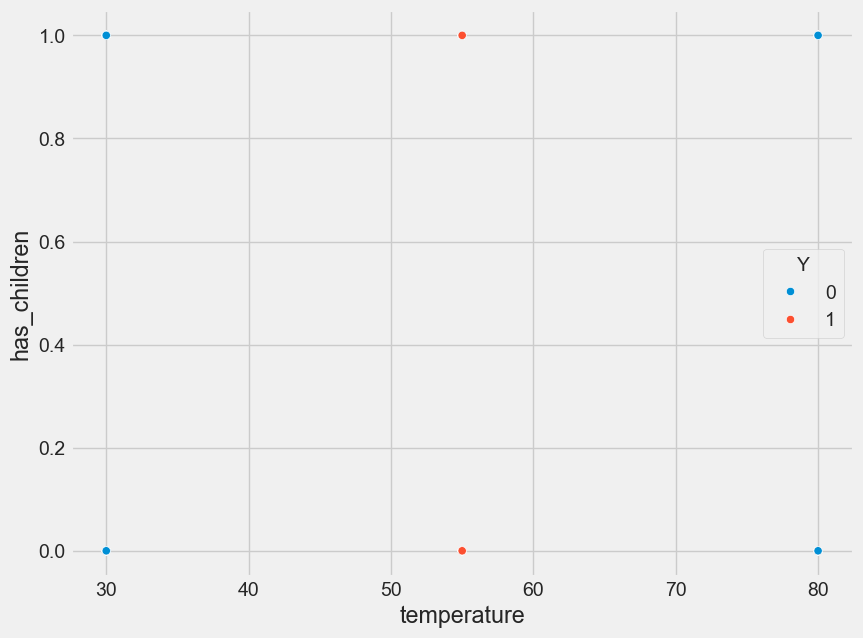

In [30]:
plt.figure(figsize=(9,7))
sns.scatterplot(df, x="temperature", y="has_children", hue="Y")
plt.show()

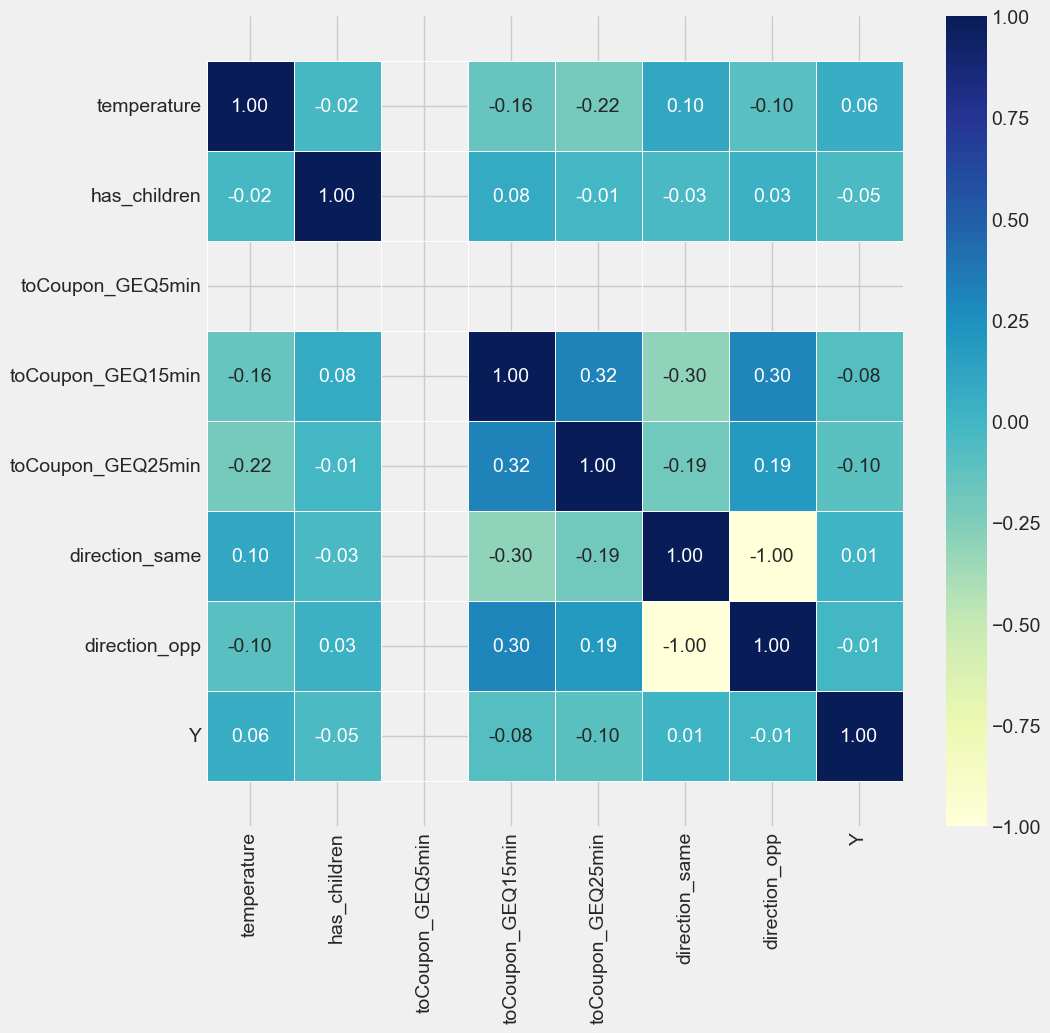

In [31]:
df_numeric = df.select_dtypes(include=["float64", "int64"])
corr = df_numeric.corr()
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(corr,
                 vmin=-1.0,
                 vmax=1.0,
                 annot=True,
                 linewidths=0.5,
                 fmt='.2f',
                 cmap='YlGnBu');
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

### Construimos los modelos 

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print('Train Result:\n================================================')
        print(f'Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%')
        print('_______________________________________________')
        print(f'CLASSIFICATION REPORT:\n{clf_report}')
        print('_______________________________________________')
        print(f'Confusion Matrix:')
        cm = confusion_matrix(y_train, pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
        disp.plot()
        plt.grid(False)
        plt.show()
        print('\n')
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print('Test Result:\n================================================')        
        print(f'Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%')
        print('_______________________________________________')
        print(f'CLASSIFICATION REPORT:\n{clf_report}')
        print('_______________________________________________')
        print(f'Confusion Matrix:')
        cm = confusion_matrix(y_test, pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
        disp.plot()
        plt.grid(False)
        plt.show()

In [33]:
from sklearn.model_selection import train_test_split

X = df_numeric.drop('Y', axis=1)
y = df_numeric.Y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Hacemos la Logistic Regression

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'C': 1.623776739188721, 'solver': 'liblinear'}
Train Result:
Accuracy Score: 58.31%
_______________________________________________
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision    0.55    0.59      0.58       0.57          0.57
recall       0.17    0.90      0.58       0.53          0.58
f1-score     0.26    0.71      0.58       0.48          0.51
support   3825.00 5053.00      0.58    8878.00       8878.00
_______________________________________________
Confusion Matrix:


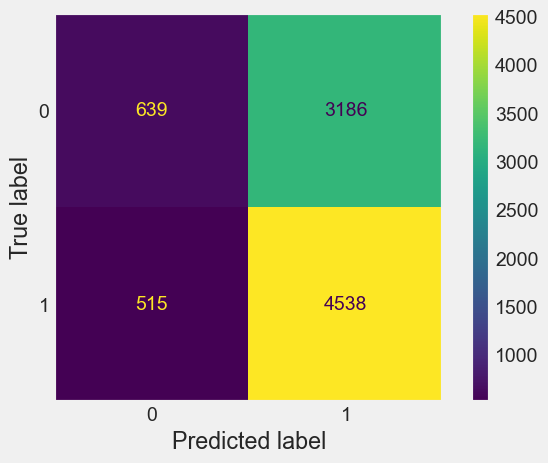



Test Result:
Accuracy Score: 58.57%
_______________________________________________
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision    0.57    0.59      0.59       0.58          0.58
recall       0.17    0.90      0.59       0.54          0.59
f1-score     0.26    0.71      0.59       0.49          0.52
support   1649.00 2157.00      0.59    3806.00       3806.00
_______________________________________________
Confusion Matrix:


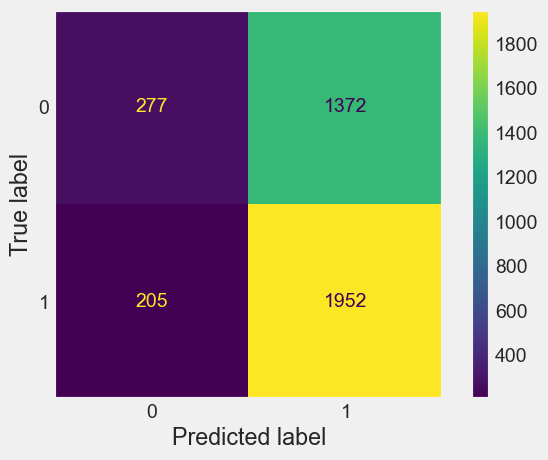

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

params = {'C': np.logspace(-4, 4, 20),
          'solver': ['liblinear']}

lr_clf = LogisticRegression()

lr_cv = GridSearchCV(lr_clf, params, scoring='accuracy', n_jobs=-1, verbose=1, cv=5)
lr_cv.fit(X_train, y_train)
best_params = lr_cv.best_params_
print(f'Best parameters: {best_params}')
lr_clf = LogisticRegression(**best_params)

lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

In [35]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

results_df = pd.DataFrame(
    data=[['Tuned Logistic Regression', train_score, test_score]], 
    columns=['Model', 'Training Accuracy %', 'Testing Accuracy %']
)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,58.31,58.57


### Creamos la curva de aprendizaje

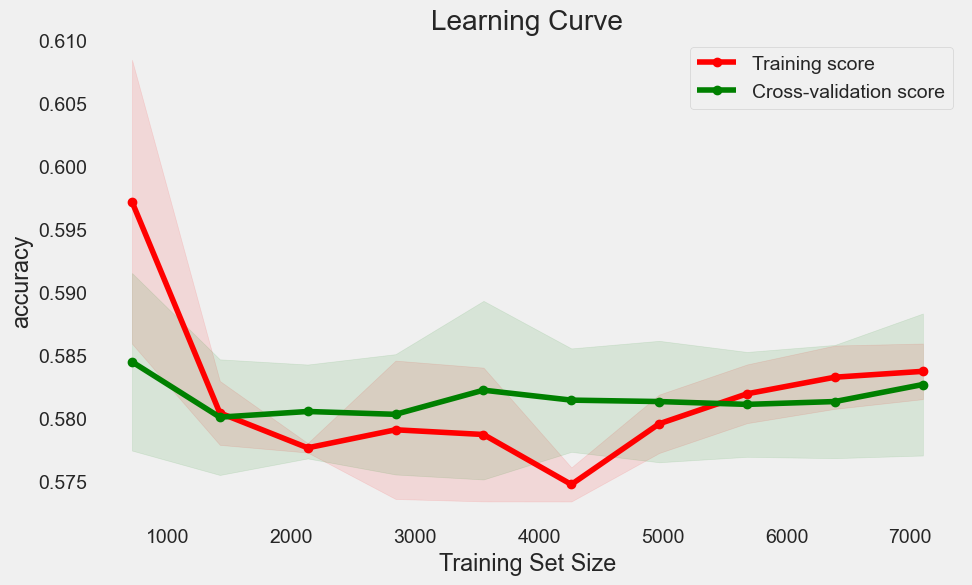

In [37]:
# Hacemos la gráfica
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring, train_sizes=train_sizes, n_jobs=-1
    )
    
    # Calcular medias y desviaciones estándar
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    # Hacemos las graficas
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label="Cross-validation score")
    plt.fill_between(train_sizes,
                     train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std,
                     alpha=0.1, color="r")
    plt.fill_between(train_sizes,
                     test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std,
                     alpha=0.1, color="g")
    plt.title("Learning Curve")
    plt.xlabel("Training Set Size")
    plt.ylabel(scoring)
    plt.legend(loc="best")
    plt.grid()
    plt.show()

plot_learning_curve(lr_clf, X_train, y_train, cv=5, scoring='accuracy')


### Para hacer la comparacion debemos guardar estos resultados en un archivo binario

In [38]:
import joblib

model2 = LogisticRegression()
model2.fit(X_train, y_train)

joblib.dump(model2, 'Model2.pk1')

['Model2.pk1']